In [6]:
import pandas as pd
# Load the demographic and income dataset
demographics_income_data = pd.read_csv("../Data/Demographic Data by Zipcode/race and income by zipcode.csv")

# Display basic information about the dataset
demographics_income_info = demographics_income_data.info()

# Display a preview of the dataset
demographics_income_preview = demographics_income_data.head()

demographics_income_info, demographics_income_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   zip code                                        97 non-null     int64  
 1   Median earnings (dollars)                       97 non-null     int64  
 2   total population                                97 non-null     int64  
 3   White                                           97 non-null     int64  
 4   Black or African American                       97 non-null     int64  
 5   American Indian and Alaska Native               97 non-null     int64  
 6   Asian                                           97 non-null     int64  
 7   Native Hawaiian and Other Pacific Islander      97 non-null     int64  
 8   Some Other Race                                 97 non-null     int64  
 9   White (%)                                    

(None,
    zip code  Median earnings (dollars)  total population  White  \
 0     77002                      54755             19616  10488   
 1     77003                      63831              9721   5945   
 2     77004                      55909             35866  14352   
 3     77005                     100839             28231  22885   
 4     77006                      73275             23927  18415   
 
    Black or African American  American Indian and Alaska Native  Asian  \
 0                       7426                                694   1049   
 1                       2274                                428    793   
 2                      18249                                376   3432   
 3                       1086                                325   4969   
 4                       2327                                704   2862   
 
    Native Hawaiian and Other Pacific Islander  Some Other Race  White (%)  \
 0                                          12       

/var/folders/vl/gkbcx4z53ns2ghqy_s_hw6740000gn/T/ipykernel_98174/2923129492.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Overflow_Count'].fillna(0, inplace=True)  # Filling NaNs with 0 (no recorded overflow)


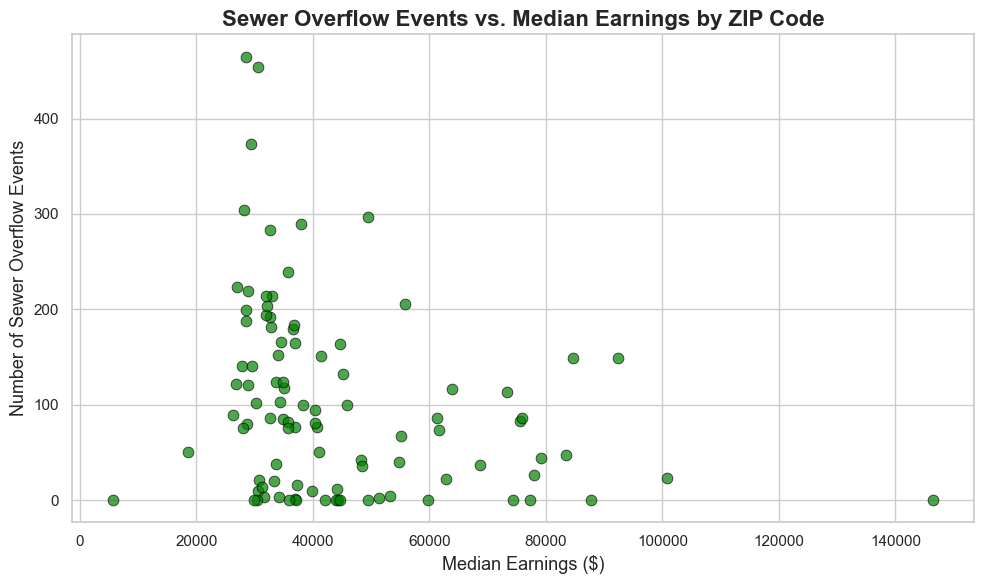

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
private_sewer_data = pd.read_csv("../Data/BCW Public and Private Original Data/Public and Private csv/combined_private_data.csv")
public_sewer_data = pd.read_csv("../Data/BCW Public and Private Original Data/Public and Private csv/all_public_data.csv")
demographics_income_data = pd.read_csv("../Data/Demographic Data by Zipcode/race and income by zipcode.csv")

# Standardizing column names for merging
demographics_income_data.rename(columns={'zip code': 'Zipcode'}, inplace=True)

# Convert ZIP codes to string for consistency in merging
demographics_income_data['Zipcode'] = demographics_income_data['Zipcode'].astype(str)
private_sewer_data['Zipcode'] = private_sewer_data['Zipcode'].dropna().astype(int).astype(str)
public_sewer_data['Zipcode'] = public_sewer_data['Zipcode'].dropna().astype(int).astype(str)

# Combine private and public sewer data
sewer_data = pd.concat([private_sewer_data[['Zipcode']], public_sewer_data[['Zipcode']]], ignore_index=True)

# Count the number of overflow events per ZIP code
overflow_counts = sewer_data['Zipcode'].value_counts().reset_index()
overflow_counts.columns = ['Zipcode', 'Overflow_Count']

# Merge sewer overflow counts with demographic and income data
merged_data = pd.merge(demographics_income_data, overflow_counts, on='Zipcode', how='left')
merged_data['Overflow_Count'].fillna(0, inplace=True)  # Filling NaNs with 0 (no recorded overflow)

# Scatter plot of median earnings vs. sewer overflow count (with blue 'x' markers)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(
    data=merged_data,
    x='Median earnings (dollars)',
    y='Overflow_Count',
    color='green',
    s=60,
    alpha=0.7,
    edgecolor='black'
)

plt.title('Sewer Overflow Events vs. Median Earnings by ZIP Code', fontsize=16, weight='bold')
plt.xlabel('Median Earnings ($)', fontsize=13)
plt.ylabel('Number of Sewer Overflow Events', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()



/var/folders/vl/gkbcx4z53ns2ghqy_s_hw6740000gn/T/ipykernel_98174/3284107616.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Overflow_Count'].fillna(0, inplace=True)  # Filling NaNs with 0 (no recorded overflow)


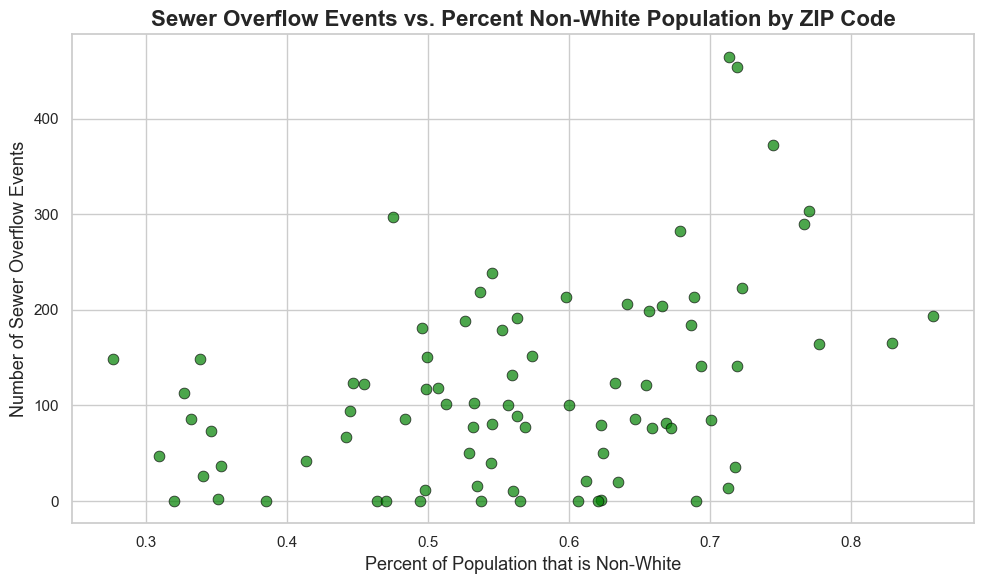

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
private_sewer_data = pd.read_csv("../Data/BCW Public and Private Original Data/Public and Private csv/combined_private_data.csv")
public_sewer_data = pd.read_csv("../Data/BCW Public and Private Original Data/Public and Private csv/all_public_data.csv")
demographics_minority_data = pd.read_csv("../Data/Demographic Data by Zipcode/minority_percent_by_zip.csv")

# Standardizing column names for merging
demographics_minority_data.rename(columns={'zip code': 'Zipcode'}, inplace=True)

# Convert ZIP codes to string for consistency in merging
demographics_minority_data['Zipcode'] = demographics_minority_data['Zipcode'].astype(str)
private_sewer_data['Zipcode'] = private_sewer_data['Zipcode'].dropna().astype(int).astype(str)
public_sewer_data['Zipcode'] = public_sewer_data['Zipcode'].dropna().astype(int).astype(str)

# Combine private and public sewer data
sewer_data = pd.concat([private_sewer_data[['Zipcode']], public_sewer_data[['Zipcode']]], ignore_index=True)

# Count the number of overflow events per ZIP code
overflow_counts = sewer_data['Zipcode'].value_counts().reset_index()
overflow_counts.columns = ['Zipcode', 'Overflow_Count']

# Merge sewer overflow counts with demographic and income data
merged_data = pd.merge(demographics_minority_data, overflow_counts, on='Zipcode', how='left')
merged_data['Overflow_Count'].fillna(0, inplace=True)  # Filling NaNs with 0 (no recorded overflow)

# Scatter plot of median earnings vs. sewer overflow count (with blue 'x' markers)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(
    data=merged_data,
    x='Percent Minority',
    y='Overflow_Count',
    color='green',
    s=60,
    alpha=0.7,
    edgecolor='black'
)

plt.title('Sewer Overflow Events vs. Percent Non-White Population by ZIP Code', fontsize=16, weight='bold')
plt.xlabel('Percent of Population that is Non-White', fontsize=13)
plt.ylabel('Number of Sewer Overflow Events', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

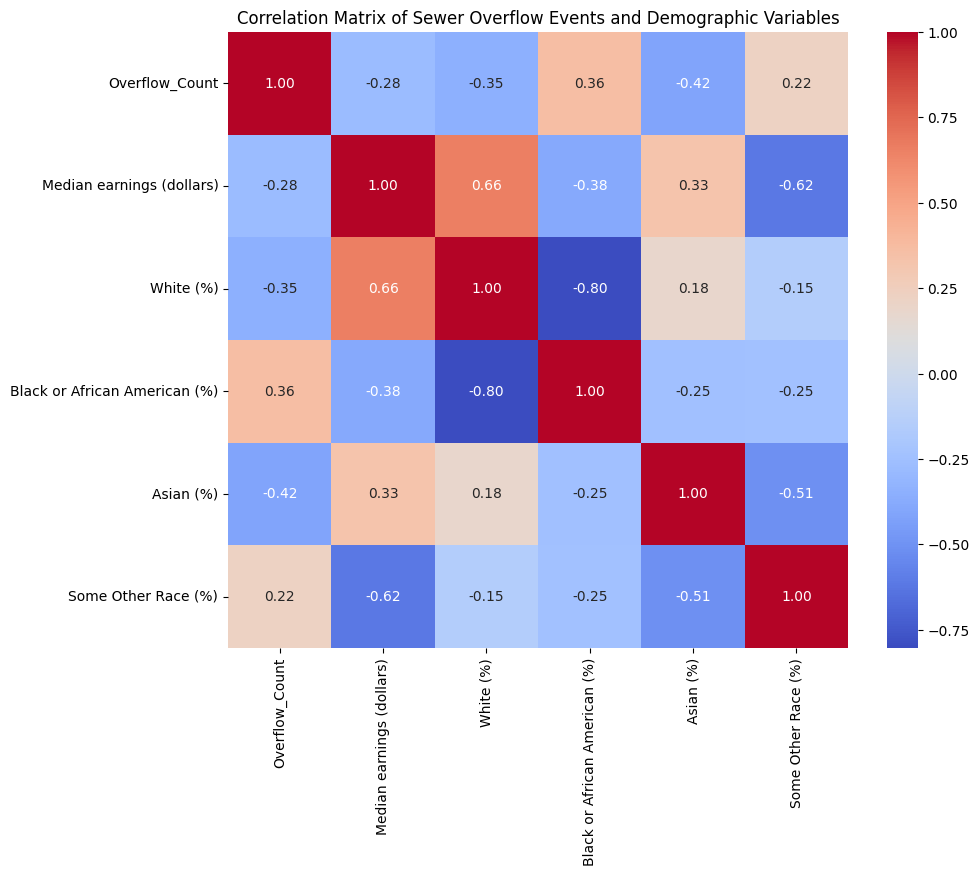

In [8]:
# Correlation matrix
correlation_matrix = merged_data[['Overflow_Count', 'Median earnings (dollars)',
                                  'White (%)', 'Black or African American (%)',
                                  'Asian (%)', 'Some Other Race (%)']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sewer Overflow Events and Demographic Variables')
plt.show()

